Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


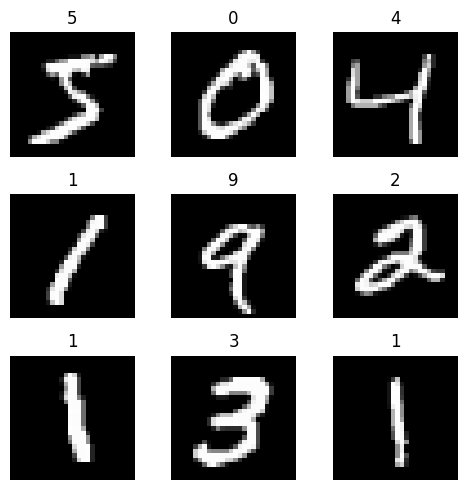

Epoch 1/12


c:\Users\cyren\Documents\cnn-mnist-digit-recognition\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


769/769 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7379 - loss: 0.7782 - val_accuracy: 0.9737 - val_loss: 0.0855
Epoch 2/12
769/769 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9526 - loss: 0.1561 - val_accuracy: 0.9822 - val_loss: 0.0624
Epoch 3/12
769/769 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9647 - loss: 0.1127 - val_accuracy: 0.9860 - val_loss: 0.0471
Epoch 4/12
769/769 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9702 - loss: 0.0953 - val_accuracy: 0.9886 - val_loss: 0.0400
Epoch 5/12
769/769 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9739 - loss: 0.0847 - val_accuracy: 0.9885 - val_loss: 0.0399
Epoch 6/12
769/769 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9773 - loss: 0.0756 - val_accuracy: 0.9894 - val_loss: 0.0384
Epoch 7/12
769/769 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9801 - loss: 0.0649 - val_accuracy: 0.9892 - val_loss: 0.0372
Epoch 8/12
769/769 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9790 - loss: 0.0676 - val_accuracy: 0.9902 - val_

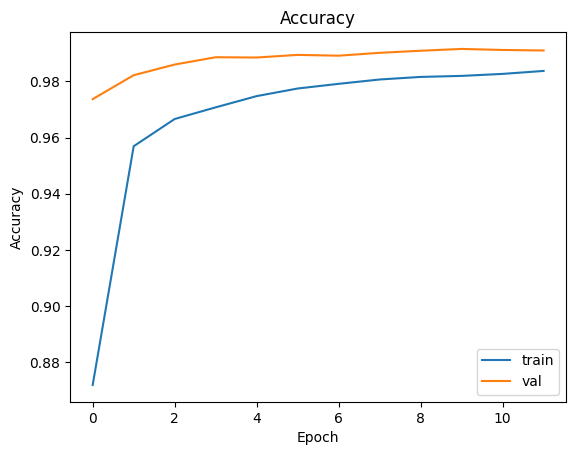

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step


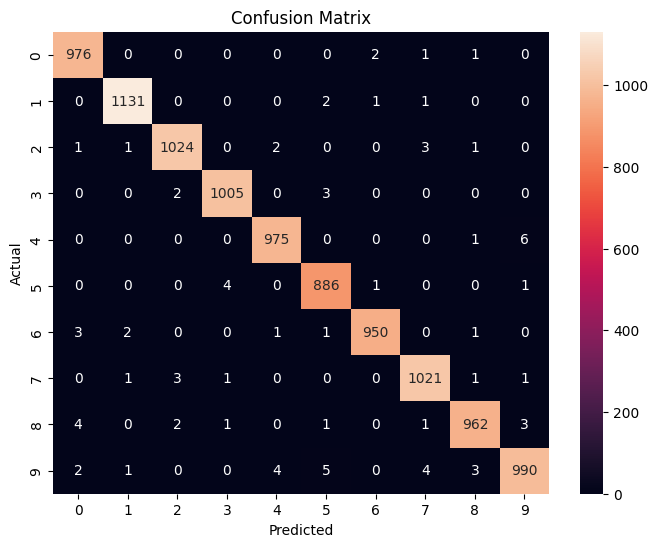

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Keras stuff
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Quick data check
print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)

# Show a few digits
plt.figure(figsize=(5,5))
for idx in range(9):
    plt.subplot(3,3,idx+1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(f"{y_train[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Normalize and reshape
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Model definition
model = Sequential()
model.add(Conv2D(16, (5,5), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

# Compile model
adam = Adam(learning_rate=1e-3)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# Training
hist = model.fit(x_train, y_train, validation_split=0.18, epochs=12, batch_size=64, verbose=1)

# Evaluate
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy = {score[1]:.3f}")

# Accuracy plot
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='val')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Confusion matrix
preds = np.argmax(model.predict(x_test), axis=1)
truths = np.argmax(y_test, axis=1)

cm = confusion_matrix(truths, preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()
